# SVM for classification

Load IRIS dataset, check its contents:


In [6]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Split data into training and testing parts:

In [7]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
X.shape
print(y_train)

(120, 4)
(30, 4)
[0 1 2 1 1 1 2 0 0 1 2 2 0 2 2 0 0 2 2 0 0 2 0 0 1 0 1 1 2 1 0 2 0 2 0 0 2
 2 2 0 2 0 1 1 0 1 2 1 0 2 2 0 0 1 0 2 1 1 1 1 0 2 2 1 2 0 1 1 1 1 2 1 1 1
 1 1 0 2 1 0 1 0 2 0 0 1 2 0 0 0 0 2 2 0 2 1 0 2 2 0 2 0 0 2 2 0 0 2 1 2 2
 1 2 1 1 0 1 0 0 1]


Use a Support Vector Machine for classification:


In [8]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [9]:
from sklearn.model_selection import train_test_split
X=iris.data[iris.target!=2,0:2]
y=iris.target[iris.target!=2]
#X=iris.data[:,0:2]
#y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(y_test.shape)
print(y_test)




(80, 2)
(20,)
[0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0]


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

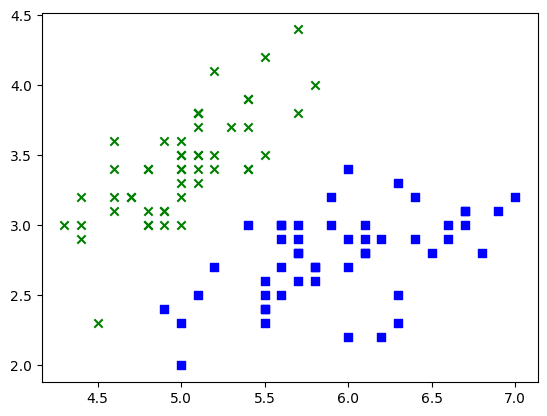

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X[y==0,0],X[y==0,1],color='green',marker='x')
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='s')



#plt.scatter(X[y==0,0],X[y==0,1],color='green')
#plt.scatter(X[y==1,0],X[y==1,1],color='blue')
#plt.scatter(X[y==2,0],X[y==2,1],color='cyan')

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [11]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

In [12]:
supvectors=SVMmodel.support_vectors_
W=SVMmodel.coef_
b=SVMmodel.intercept_
print(W)
print(b)

[[ 2.22543629 -2.22255231]]
[-5.01740171]


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

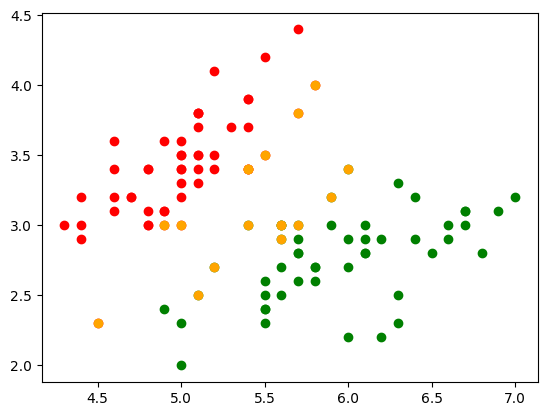

[[ 2.22543629 -2.22255231]]
[-5.01740171]
[4.3 4.6 4.9 5.2 5.5 5.8 6.1 6.4 6.7 7. ]


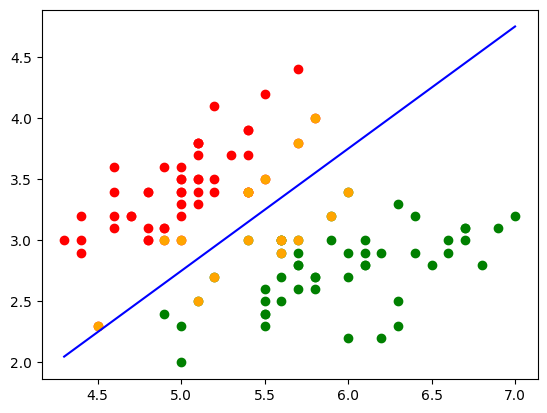

In [19]:
supervectors=SVMmodel.support_vectors_
W=SVMmodel.coef_
b=SVMmodel.intercept_


# Plot the support vectors here
plt.figure()

plt.scatter(X[y==0,0], X[y==0,1], color = 'red')
plt.scatter(X[y==1,0], X[y==1,1], color = 'green')

plt.scatter(supvectors[:,0], supvectors[:, 1], color='orange')

plt.show()



#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_
print(W)
print(b)
supvectors
xgrid=np.linspace(min(X[:,0]), max(X[:,0]), 10)
print(xgrid)

x_1 = (-(W[:,0]/W[:,1])*xgrid)-(b/W[:,1])

plt.figure()

plt.scatter(X[y==0,0], X[y==0,1], color = 'red')
plt.scatter(X[y==1,0], X[y==1,1], color = 'green')

plt.scatter(supvectors[:,0], supvectors[:, 1], color='orange')
plt.plot(xgrid, x_1, color='blue')

plt.show()


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

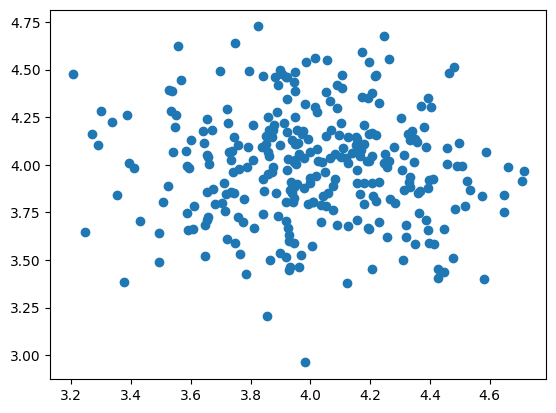

In [20]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1]


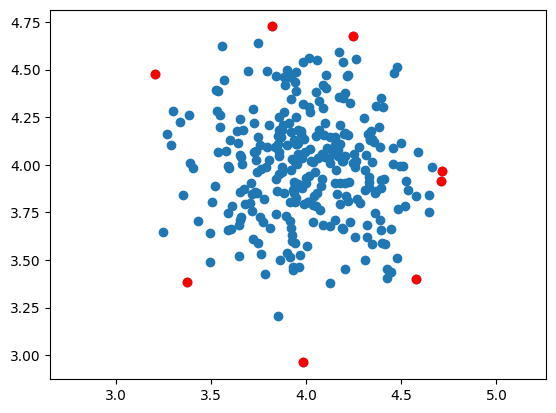

In [15]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
print(pred)

anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

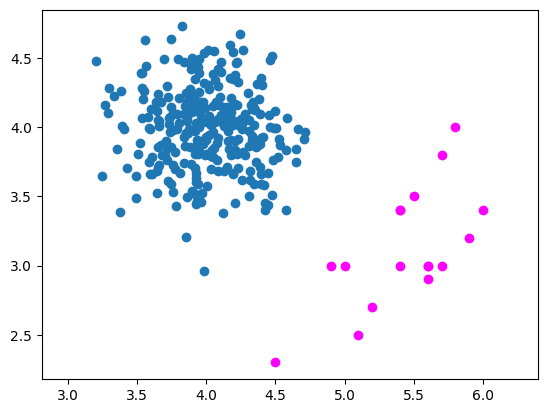

In [17]:
plt.scatter(x[:,0],x[:,1])

plt.axis('equal')
supervectors2=SVMmodel.support_vectors_


#plt.scatter(values[:,0], values[1:0], color='red')
plt.scatter(supervectors2[:,0],supervectors2[:,1],color='magenta')
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.880506381723395


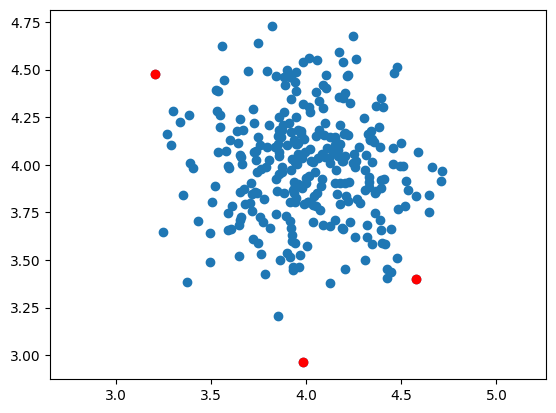

In [18]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()